<hr/>

# Data Mining


<hr/>

<h2><font color="darkblue">Assignment 1</font></h2>

For these problems, you can use any of the `numpy` and `matplotlib` routines but not those in `scipy` or `sklearn`

#### Deadline
Homework is due in a week, and should be submitted on Blackboard. Don't wait till the last minute!

####  Work alone!
Please work on your own solving these assignments! 

In [325]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set()


### Problem 1

Characterize the data set in this [CSV](A1-Problem1.csv) file using descriptive statistics.
The comma-separated separated file contains just 1 column and 1000 rows.


1. Load the data, e.g., using routines in `numpy` or `pandas` (1 pt)
2. Calculate the mean, variance, skewness, kurtoisis using the `numpy.array` operations, e.g., `np.square()` and `np.sum()` or the appropriate methods on the `array` object (1 pt)
3. Create a histogram of the data and plot it  (1 pt)
4. Use KDE with Gaussian kernels to approximate the density and compare that visually to the histogram (2 pts)
5. Summarize the results with your own words (1 pt)

Total of 6 points

#### Basic descriptive statistics

In [326]:
from numpy import pi, exp

# 1. load data, using numpy routines
name = "A1-Problem1.csv"
data = np.sort(np.loadtxt(name))

# 2. calculate mean, variance, skewness, and kurtosis
def inner(data: np.ndarray):
    mu = np.mean(data)
    var = np.var(data)
    sigma = np.sqrt(var)
    return (data - mu) / sigma

def skewness(data: np.ndarray):
    scaled = inner(data)
    return np.mean(scaled**3)

def kurtosis(data: np.ndarray):
    scaled = inner(data)
    return np.mean(scaled**4)

# 2. calculate mean, variance, skewness, and kurtosis
mean = np.mean(data)
variance = np.var(data)
skew = skewness(data)
kurt = kurtosis(data)

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Skew: {skew}")
print(f"Kurtosis: {kurt}")

Mean: -48.85508510712677
Variance: 0.40234882126160904
Skew: 2.5273230000626037
Kurtosis: 11.440531362725967


#### KDE and histogram

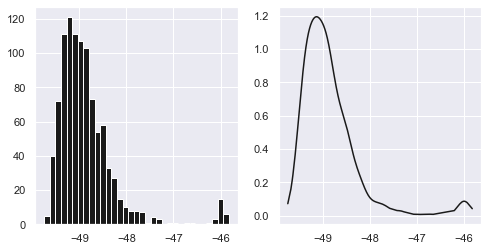

In [331]:
def gaussian_kernel(x, mu=None, sigma=None):
    if mu is None:
        mu = mean(x)
    if sigma is None:
        sigma = sqrt(var(x))
    return exp((-1*2)*(((x-mu)/sigma)**2))

def plot_kernel_density(data, h=0.3, axis=None):
    # h is bandwidth
    data = np.sort(data)
    n = len(data)
    a = np.atleast_2d(data)
    b = a.copy().T
    diff_matrix = (b - a)/h
    kernels = gaussian_kernel(diff_matrix, mu=0, sigma=1)
    out = np.sum(kernels, axis=1) * (1/(h*n))
    
    x_axis = np.linspace(data.min(), data.max(), len(data))
    if axis:
        axis.plot(data, out, 'k', )
    else:
        plt.plot(data, out, 'k', );
        
# 3. Create a histogram of the data and plot it
# 4. Then, use KDE with Gaussian kernels to approximate density and compare
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(data, hist=True, kde=False, color='k', ax=ax[0], hist_kws={'alpha':1});
plot_kernel_density(data, h=.23, axis=ax[1])  # Looks pretty similar!

#### Summary

This data is roughly normally distributed at an average of around -49, with a positive skew. There are also a few data points at around -46, giving the density function two peaks (although the rightward peak is much smaller). The variance is quite small (less than 1), with a minimum value of around -50 and a maximum value of around -45. The vast majority of the density is between -50 and -48.

### Problem 2

Generate random license tags with the format `A12-34B`

1. Generate a random 2 digit integer (1 pt)
2. Generate a random character (1 pt)
3. Create a `pandas.Dataframe` that contains 25 license tag numbers of the above format (1 pt)

Total of 3 points

In [314]:
# Generate a random 2 digit integer
randint = lambda: np.random.randint(10, 100)
i = randint()

# Generate a random character
randchar = lambda: np.random.choice(list(('ABCDEFGHIJKLMNOPQRSTUVWXYZ')))
c = randchar()

# Create a pandas.Dataframe that contains 25 license tag numbers of the above format
def make_license():
    c1, c2 = randchar(), randchar()
    n1, n2, = randint(), randint()
    return f"{c1}{n1}-{n2}{c2}"

df = pd.DataFrame([make_license() for i in range(25)], columns=["License Tags"])
df

,License Tags
0,Z40-23W
1,R31-65C
2,A20-58G
3,L79-19U
4,E11-32A
5,Z76-31K
6,O16-23M
7,M37-88J
8,C27-97T
9,A28-95Y


### Problem 3

Draw random samples from a bivariate normal distribution with 

> $\displaystyle \quad \mu = \begin{bmatrix} 0 \\ 0\end{bmatrix} \quad$ 
> and 
> $\displaystyle \quad C = \begin{bmatrix} 4 & 1 \\ 1 & 1\end{bmatrix}$

1. Generate 200 random numbers that are normally distributed, call this array `X` (1 pt)
2. Reshape `X` to be 2 by 100 representing 100 random 2-vectors, and plot these 2-D points (1 pt)
2. Solve the eigenproblem of the covariance matrix (1 pt)
3. Use the eigenvalues and eigenvectors to transform `X` and calculate the final sample `Z` drawn from the bivariate normal distribution with the above $\mu$ and $C$ (2 pts)
4. Plot the samples (1 pt)

Total of 6 points

#### Data generation and plotting

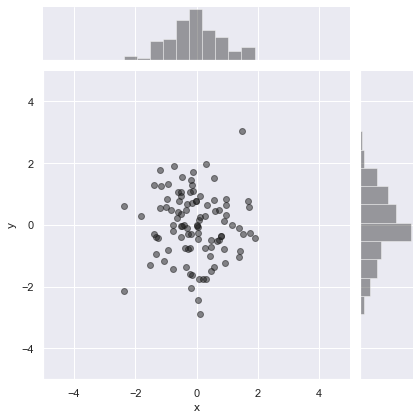

In [315]:
# 1. Generate 200 random numbers that are normally distributed, call this array `X`
# X = np.random.multivariate_normal([0, 0], np.array([[4, 1],[1, 1]]), size=100)
# sns.jointplot(x="x", y="y", data=pd.DataFrame(X, columns=["x", "y"]), xlim=(-5, 5), ylim=(-5, 5), color="k", alpha=0.5);
X = np.random.randn(200)

# Reshape X to be 2 by 100 representing 100 random 2-vectors, and plot these 2-D points
X = X.reshape(2,100)
df = pd.DataFrame(X.T, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df, xlim=(-5, 5), ylim=(-5, 5), color="k", alpha=0.5);

#### Solve eigenproblem, X transformation

covmatrix: 
[[4 1]
 [1 1]]
eigenvectors: 
 [[ 0.95709203 -0.28978415]
 [ 0.28978415  0.95709203]]
eigenvalues: [4.30277564 0.69722436] 



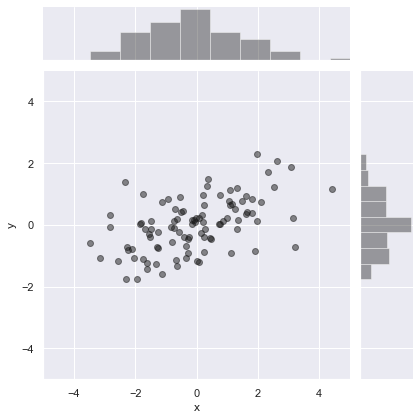

In [324]:
# Solve the eigenproblem of the covariance matrix
covmatrix = np.array([[4, 1],[1, 1]])
eigvals, eigvecs = np.linalg.eig(covmatrix)

print(f"covmatrix: \n{covmatrix}")
print(f"eigenvectors: \n {eigvecs}",)
print(f"eigenvalues: {eigvals} \n")

# Use the eigenvalues and eigenvectors to transform X and 
# calculate the final sample Z drawn from the bivariate normal distribution 
# with the above  𝜇  and  𝐶
T = eigvecs @ np.sqrt(np.diag(eigvals))
scaled_X = T @ X

# Plot the samples
df_scaled = pd.DataFrame(scaled_X.T, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df_scaled, xlim=(-5, 5), ylim=(-5, 5), color="k", alpha=0.5);